#AfDesign (v1.1.1)
Backprop through AlphaFold for protein design.

**WARNING**
1.   This notebook is in active development and was designed for demonstration purposes only.
2.   Using AfDesign as the only "loss" function for design might be a bad idea, you may find adversarial sequences (aka. sequences that trick AlphaFold).

In [5]:
#@title setup
#%%time
import os
if not os.path.isdir("params"):
  # get code
  os.system("pip -q install git+https://github.com/sokrypton/ColabDesign.git@v1.1.1")
  # for debugging
  os.system("ln -s /usr/local/lib/python3.*/dist-packages/colabdesign colabdesign")
  # download params
  os.system("mkdir params")
  os.system("apt-get install aria2 -qq")
  os.system("aria2c -q -x 16 https://storage.googleapis.com/alphafold/alphafold_params_2022-12-06.tar")
  os.system("tar -xf alphafold_params_2022-12-06.tar -C params")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
from colabdesign import mk_afdesign_model, clear_mem
from IPython.display import HTML
#from google.colab import files
import numpy as np

In [6]:
import jax
jax.config.update("jax_default_device", jax.devices()[0])

# fixed backbone design (fixbb)
For a given protein backbone, generate/design a new sequence that AlphaFold thinks folds into that conformation.

In [7]:
clear_mem()
af_model = mk_afdesign_model(protocol="fixbb")
af_model.prep_inputs(pdb_filename="5O3L.pdb", 
                     chain="A,C,E,G,I", copies=5, homooligomer=True,
                     #fix_pos="306-341,364-367")
                     #fix_pos="327-341,364-367")
                     #fix_pos="306-341,364-367")
                     #fix_pos="327-341,364-378")
                     fix_pos="327-367")

print("length",  af_model._len)
print("weights", af_model.opt["weights"])

length 73
weights {'con': 0.0, 'dgram_cce': 1.0, 'exp_res': 0.0, 'fape': 0.0, 'helix': 0.0, 'i_con': 0.0, 'i_pae': 0.0, 'pae': 0.0, 'plddt': 0.0, 'rmsd': 0.0, 'sc_chi': 0.0, 'sc_chi_norm': 0.0, 'sc_fape': 0.0}


In [8]:
template_mode = "custom"
use_templates = template_mode in ["mmseqs2","custom"]
pdb = "5O3L"
chain = "A,C,E,G,I"
rm_template_seq = False
propagate_to_copies = False
rm_interchain = False
do_not_align = False
rm_sidechain = rm_sequence = rm_template_seq

In [4]:
#af_model._args['best_metric'] = 'plddt'

In [5]:
af_model.restart(seed=0, rm_aa="C")
af_model.design_3stage(100, 10, 10, True, save_best=True)
#af_model.design_semigreedy(tries=10)

Stage 1: running (logits → soft)
1 models [3] recycles 0 hard 0 soft 0.01 temp 1 seqid 0 loss 1.20 dgram_cce 1.20 plddt 0.42 ptm 0.14 i_ptm 0.11 rmsd 39.59
2 models [2] recycles 0 hard 0 soft 0.02 temp 1 seqid 0.06 loss 1.15 dgram_cce 1.15 plddt 0.34 ptm 0.14 i_ptm 0.12 rmsd 39.82
3 models [2] recycles 0 hard 0 soft 0.03 temp 1 seqid 0.06 loss 1.24 dgram_cce 1.24 plddt 0.35 ptm 0.20 i_ptm 0.14 rmsd 45.94
4 models [3] recycles 0 hard 0 soft 0.04 temp 1 seqid 0.09 loss 1.09 dgram_cce 1.09 plddt 0.38 ptm 0.18 i_ptm 0.14 rmsd 36.93
5 models [4] recycles 0 hard 0 soft 0.05 temp 1 seqid 0.03 loss 1.11 dgram_cce 1.11 plddt 0.27 ptm 0.14 i_ptm 0.12 rmsd 31.10
6 models [2] recycles 0 hard 0 soft 0.06 temp 1 seqid 0 loss 1.07 dgram_cce 1.07 plddt 0.30 ptm 0.20 i_ptm 0.17 rmsd 26.05
7 models [1] recycles 0 hard 0 soft 0.07 temp 1 seqid 0 loss 1.16 dgram_cce 1.16 plddt 0.36 ptm 0.17 i_ptm 0.13 rmsd 60.45
8 models [1] recycles 0 hard 0 soft 0.08 temp 1 seqid 0 loss 1.08 dgram_cce 1.08 plddt 0.36 pt

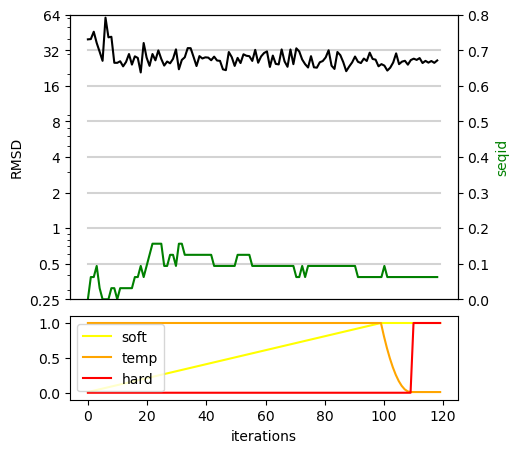

In [6]:
af_model.plot_traj()

In [7]:
af_model.save_pdb(f"{af_model.protocol}.pdb")
af_model.plot_pdb()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
HTML(af_model.animate())

<IPython.core.display.HTML object>

In [11]:
#af_model.get_seqs()

In [12]:
#af_model._tmp['best']['aux']['seq']['hard'].shape